<a href="https://colab.research.google.com/github/hananajiyya/Python-Practice/blob/main/fuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline

In [ ]:
# Antecedents
time= ctrl.Antecedent(np.arange(3, 13), 'time')
wages = ctrl.Antecedent(np.arange(1000, 3500), 'wages')

# Consequents
cmd = ctrl.Consequent(np.arange(0, 10), 'command')

In [ ]:
# Time (periode) bekerja dalam sehari memberships
time['sebentar'] = fuzz.trimf(time.universe, [3, 4, 7])
time['normal'] = fuzz.trimf(time.universe, [6, 8, 10])
time['eksploitasi'] = fuzz.trimf(time.universe, [9, 11, 13])

In [ ]:
# Wages (upah yang diterima perbulan) memberships
wages['sangat sedikit'] = fuzz.trimf(wages.universe, [1000, 1200, 1500])
wages['sedikit'] = fuzz.trimf(wages.universe, [1400, 1700, 2200])
wages['normal'] = fuzz.trimf(wages.universe, [2100, 2600, 3000])
wages['lebih'] = fuzz.trimf(wages.universe, [2900, 3300, 3500])

In [ ]:
# Command memberships
cmd['tereksploitasi'] = fuzz.trimf(cmd.universe, [0, 2, 4])
cmd['kurang sejahtera'] = fuzz.trimf(cmd.universe, [4, 5, 6])
cmd['sejahtera'] = fuzz.trimf(cmd.universe, [6, 7, 8])
cmd['sangat sejahtera'] = fuzz.trimf(cmd.universe, [8, 9, 10])

In [ ]:
# Rule system
# Rules for terksploitasi
rule1 = ctrl.Rule(
    (time['sebentar'] & wages['sangat sedikit'])  |
    (time['normal'] & wages['sangat sedikit'])  |
    (time['eksploitasi'] & wages['sangat sedikit']) , cmd['tereksploitasi'])

In [ ]:
# Rules for kurang sejahtera
rule2 = ctrl.Rule(
    (time['sebentar'] & wages['sedikit'])  |
    (time['normal'] & wages['sedikit'])  |
    (time['eksploitasi'] & wages['normal']) |
    (time['eksploitasi'] & wages['sedikit']), cmd['kurang sejahtera'])

In [ ]:
# Rules for sejahtera
rule3 = ctrl.Rule(
    (time['sebentar'] & wages['normal'])  |
    (time['normal'] & wages['normal'])  |
    (time['eksploitasi'] & wages['lebih']), cmd['sejahtera'])

In [ ]:
# Rules for sangat sejahtera
rule4 = ctrl.Rule(
    (time['sebentar'] & wages['lebih'])  |
    (time['normal'] & wages['lebih']), cmd['sangat sejahtera'])

In [ ]:
# Control System Creation and Simulation
cmd_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
cmd_output = ctrl.ControlSystemSimulation(cmd_ctrl)



In [ ]:
# Enter values to test

time_value = float(input("Enter time (periode bekerja): "))

while time_value < 3 or time_value > 13:
    try:
        temperature_value = float(input("Please choose a number between 3 and 13 "))
    except ValueError:
        print('We expect you to enter a valid integer')

wages_value = float(input("Enter wages (upah diterima):"))

while wages_value < 1000 or wages_value > 3500:
    try:
        wages_value = float(input("Please choose a number between 1000 (1.000.000 rupiah) and 3500 (3.500.000 rupiah) "))
    except ValueError:
        print('We expect you to enter a valid integer')

cmd_output.input['time'] = time_value
cmd_output.input['wages'] = wages_value

cmd_output.compute()

Enter time (periode bekerja): 8
Enter wages (upah diterima):2600


7.0
sejahtera


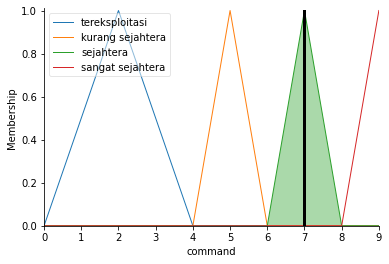

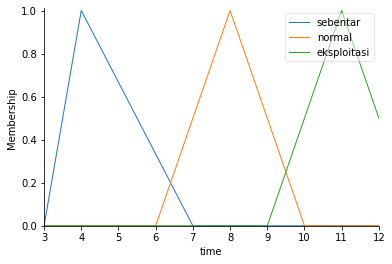

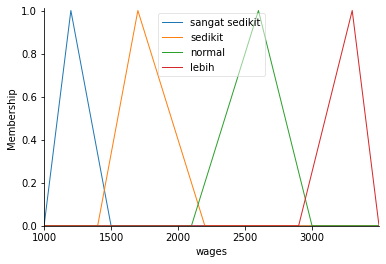

In [ ]:
# Print output command and plots
#print("Command is defined between 15 y 25")
print(cmd_output.output['command'])
if (cmd_output.output['command'] < 4 and cmd_output.output['command'] > 0):
    print('tereksploitasi')
elif (cmd_output.output['command'] < 6 and cmd_output.output['command'] > 3):
    print('kurang sejahtera')
elif (cmd_output.output['command'] < 8 and cmd_output.output['command'] > 5):
    print('sejahtera')
else:
    print('sangat sejahtera')

cmd.view(sim=cmd_output)
time.view()
wages.view()

